# supp-1: FIFA23 자료의 시각화

최규빈  
2023-10-06

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/05wk-supp.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-y3qYQqLiUULvaSfkNtx1qy&si=NUMasaFTH1hqCDe_>

# 2. Imports

In [2]:
import pandas as pd
import numpy as np
from plotnine import *

# 3. 예비학습..

## A. `dropna()`

`-` 결측치가 하나라도 포함된 모든 행을 제거하는 방법

In [3]:
df = pd.DataFrame({
    'A': [1,2,3,np.nan,5,6,7],
    'B': [11,np.nan,33,np.nan,55,66,77], 
    'C': [111,222,333,np.nan,555,666,np.nan]})
df

In [6]:
df.dropna()

## B. `_`

`-` 파이썬이 계산한 최근 결과는 `_`에 저장된다.

In [8]:
a = [1,2,3]
a + [4] 

In [9]:
_

In [11]:
_ + [5] 

In [13]:
_.pop()

In [15]:
_ + 1

# 4. FIFA23 시각화 – 문제

`# DV2022-중간고사-4-(2)의 변형`:

아래는 FIFA22의 자료를 불러오는 코드이다.

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df.head()

포지션별로 선수들의 능력치(`ShotPower`,`SlidingTackle`)와 급여(`Wage`)를
시각화하고 싶다. 아래의 세부지침에 맞추어 포지션별 `ShotPower`와
`SlidingTackle`의 산점도를 그려라. – (30점)

In [22]:
df.Position

***세부지침***

**A**. Column의 이름에서 공백을 제거하라.

**B**. 결측치가 50%이상인 컬럼을 찾고 이를 제거하라. 그 뒤에
`.dropna()`를 사용하여 결측치가 포함된 행을 제거하라.

**C**. `position_dict`를 이용하여 `df.Position`을 적절하게 변환하라.
변환된 값을 `df.Position`에 저장하라.

In [64]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

**D**. `df.Wage`를 적절하게 변환하라.

**E**. `Position==“DEFENDER”` or `Position==“FORWARD”`에 해당하는
관측치를 고른 뒤 x축에 `ShotPower`, y축에 `SlidingTackle`을 시각화하라.
이때 `Position`은 color로 구분하고 `Wage`는 size와 alpha로 구분하라.

— 시각화예시 —

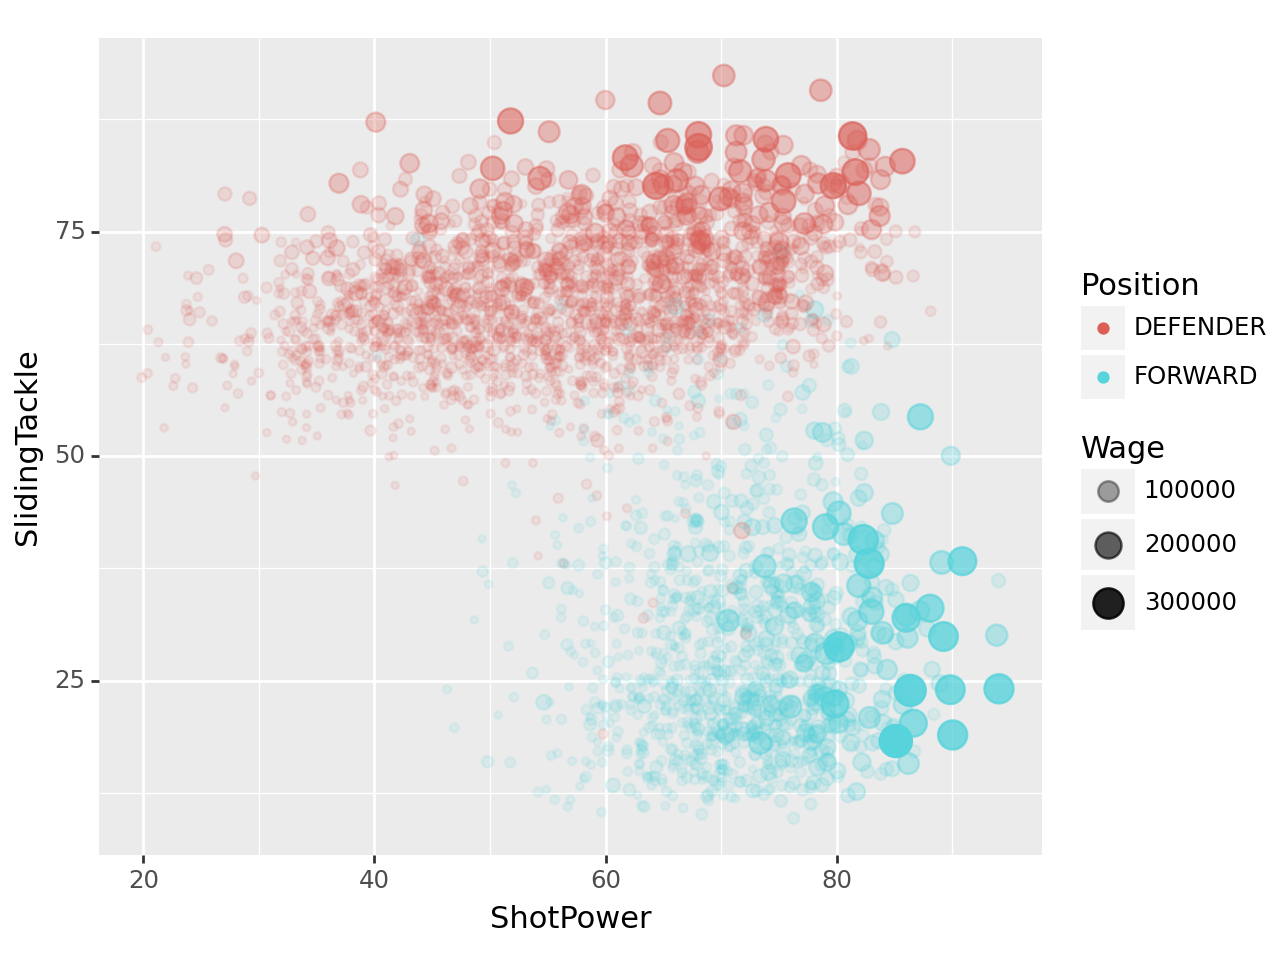

In [301]:
#

# 5. FIFA23 시각화 – 풀이1

## A. 열의 이름에서 공백제거

In [56]:
df.columns = df.columns.str.replace(' ','')

## B. 결측치제거

In [57]:
df = df.loc[:,df.isna().mean()<0.5] # 결측치가 50퍼 이상인 컬럼을 제거

In [59]:
df = df.dropna()

In [61]:
df

## C. Position 칼럼의 변환

In [89]:
df['Position'] = df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v][0])

## D. Wage 칼럼의 변환

In [98]:
df['Wage'] = df.Wage.str[1:].str.replace('K','000').astype(int)

## E. 시각화

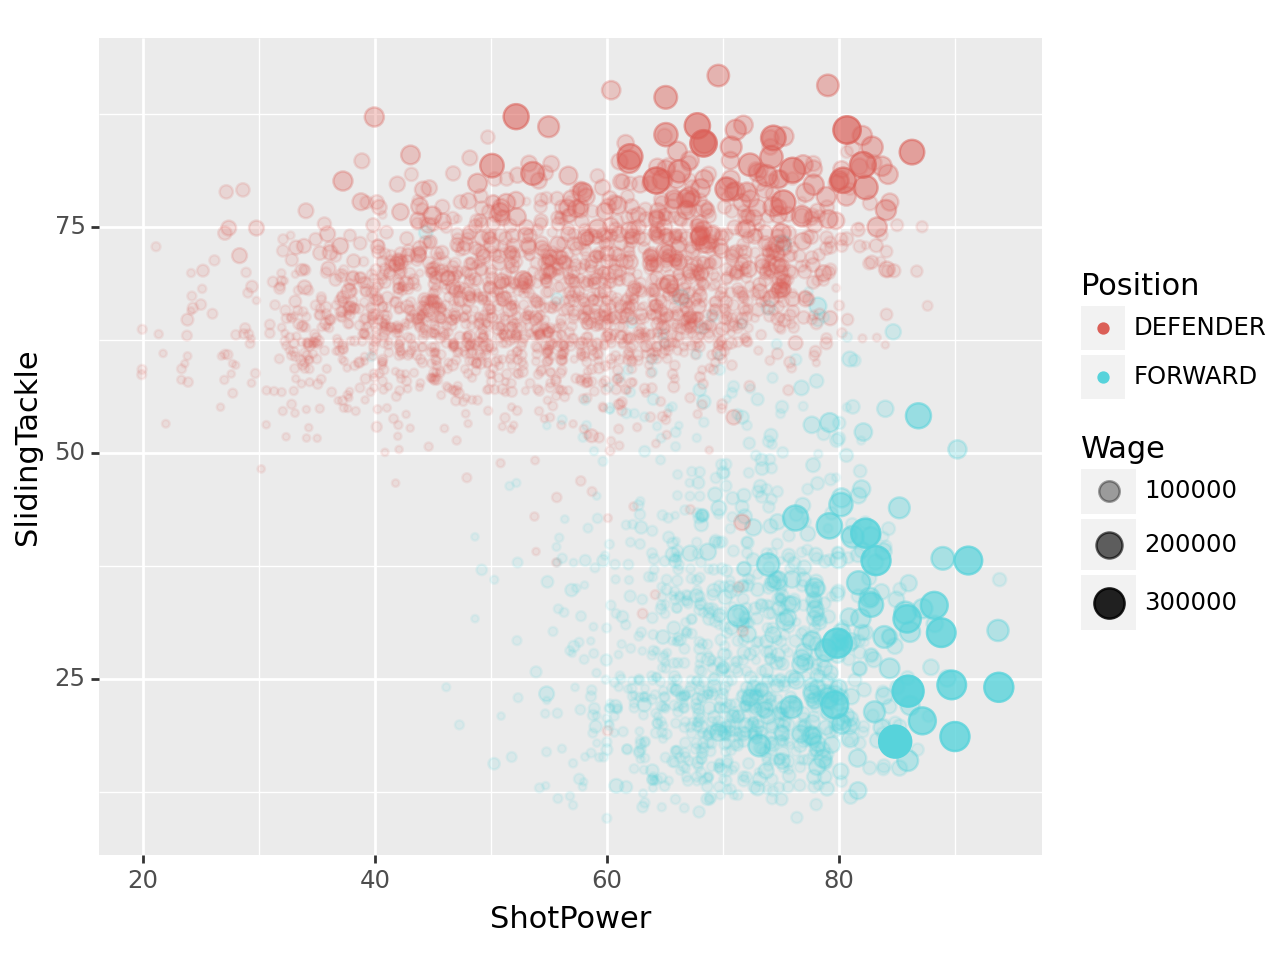

In [114]:
fig = ggplot(df.query('Position=="DEFENDER" or Position=="FORWARD"'))
point = geom_point(aes(x='ShotPower',y='SlidingTackle',color='Position',size='Wage',alpha='Wage'),position='jitter')
fig + point

# 6. FIFA23 시각화 – 망하는 경우

In [174]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

## A. 열의 이름에서 공백제거

In [175]:
df.columns = df.columns.str.replace(' ','')

## B. 결측치제거

`-` 실수로 `df.dropna()`를 먼저 사용.

In [176]:
df = df.dropna()

In [177]:
df

`-` 이럴경우는 다시 처음부터 실행해야함.

In [178]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

In [179]:
df.columns = df.columns.str.replace(' ','')

In [180]:
df = df.loc[:,df.isna().mean()<0.5]

In [181]:
df = df.dropna()

## C. Position 칼럼의 변환

`-` 실수로 아래와 같이 코드를 입력했다고 치자.

In [182]:
df['Position'] = df.Position.str.split('>').str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v])
df.Position

`-` 하지만 지금와서 고쳐보려고 해봤자 늦음..

In [183]:
df['Position'] = df.Position.str.split('>').str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop())

`-` 다시 처음부터..

In [196]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df.columns = df.columns.str.replace(' ','')
df = df.loc[:,df.isna().mean()<0.5]
df = df.dropna()
df['Position'] = df.Position.str.split('>').str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop())
df

`-` 요령1: 데이터를 불러오는 코드부터 시작해서 하나의 셀에 df를 처리하는
코드를 모두 몰아넣어서 처리하는게 유리함. (그래야 덜 당황해요
$\star\star\star\star\star$)

`-` 요령2: 데이터프레임 자체를 변환시키는 코드를 가급적 작성하지 않음.
(제가 좀 더 자주 쓰는 테크닉, 기술이 필요함)

# 7. FIFA23 시각화 – 풀이2

In [344]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

## A. 열의 이름에서 공백제거

In [236]:
df.set_axis(df.columns.str.replace(' ',''),axis=1)

## B. 결측치제거

In [309]:
_df = df.set_axis(df.columns.str.replace(' ',''),axis=1)
_df

In [323]:
df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean()<0.5].dropna()

## C. Position 칼럼의 변환

In [324]:
df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean()<0.5].dropna()\
.assign(Position = lambda _df: _df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop()))

## D. Wage 칼럼의 변환

In [325]:
df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean()<0.5].dropna()\
.assign(Position = lambda _df: _df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop()))\
.assign(Wage = lambda _df: _df.Wage.str[1:].str.replace('K','000').astype(int))

## E. 시각화

In [326]:
tidydata = df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean()<0.5].dropna()\
.assign(Position = lambda _df: _df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop()))\
.assign(Wage = lambda _df: _df.Wage.str[1:].str.replace('K','000').astype(int))

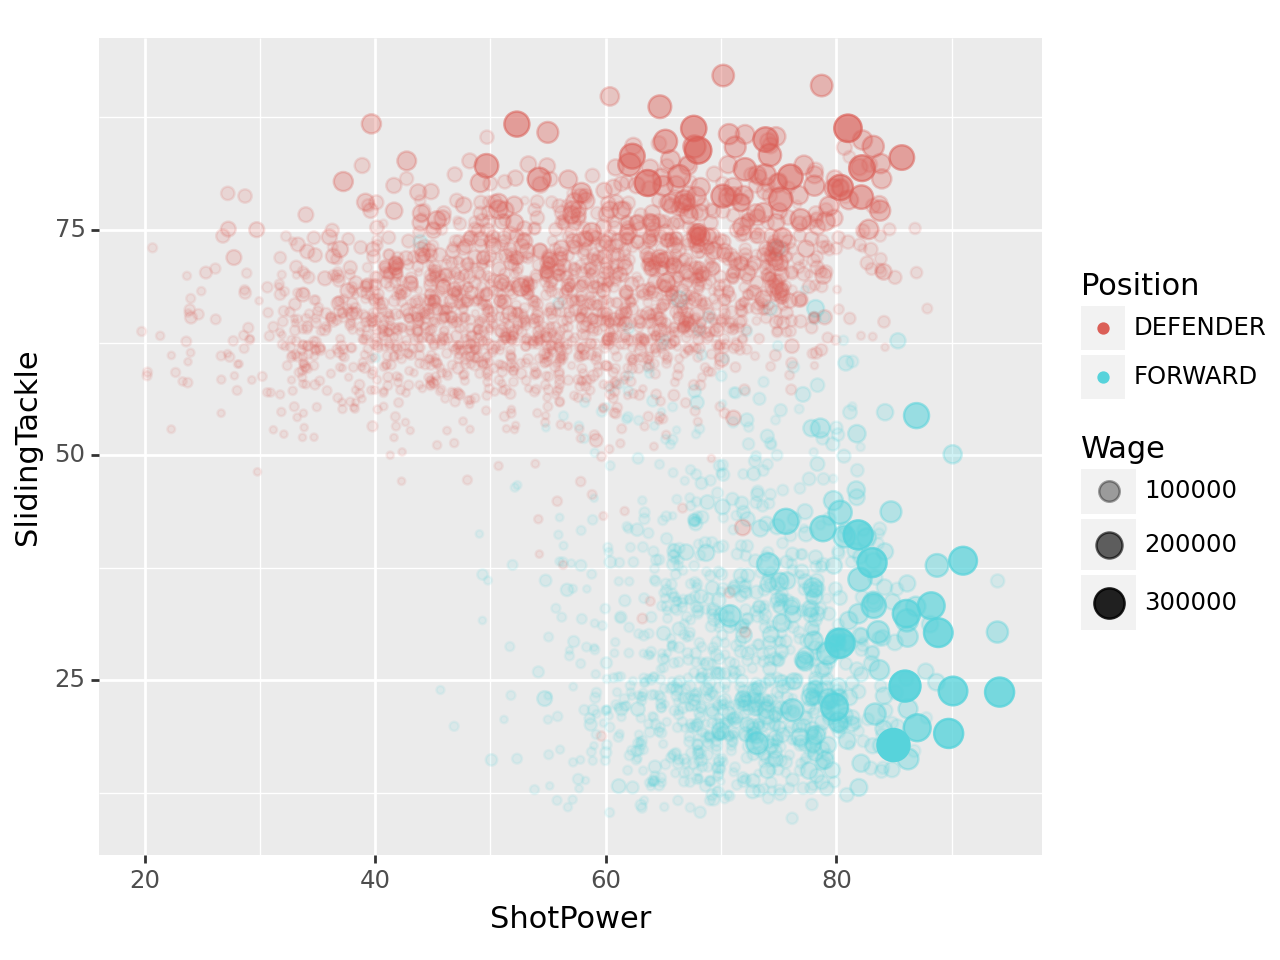

In [327]:
fig = ggplot(tidydata.query('Position=="DEFENDER" or Position=="FORWARD"'))
point = geom_point(aes(x='ShotPower',y='SlidingTackle',color='Position',size='Wage',alpha='Wage'),position='jitter')
fig + point

# 8. 숙제

`1`.

In [353]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
s = df.Wage
s

위의 자료형에서 “€250.5K”와 같은 형태의 문자열이 있는지 조사하는 코드를
작성하라.

`2`.

아래와 같은 pd.Series가 있다고 하자.

In [369]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv').iloc[[0,1,16708,16709],:].reset_index()
s = df.Value
s

아래와 같은 변환을 수행하라.

|  변환전   | 변환후    |
|:---------:|:----------|
| ‘€107.5M’ | 107500000 |
|  ‘€93M’   | 93000000  |
|  ‘€110K’  | 110000    |
|   ‘€0’    | 0         |

**hint** 아래를 이용하면 쉬울껄요?

In [366]:
eval('100*100')